<a href="https://colab.research.google.com/github/pspanji/BA--BI--DS/blob/main/RFM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly as pt
import geopandas as gpd

In [90]:
df1 = pd.read_csv('/content/drive/MyDrive/customer_supermarket.csv',error_bad_lines=False, sep='\t')
df1

<ipython-input-90-171967b4532f>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv('/content/drive/MyDrive/customer_supermarket.csv',error_bad_lines=False, sep='\t')


,Unnamed: 0,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,0,536365,01/12/10 08:26,"2,55",17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,1,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,2,536365,01/12/10 08:26,"2,75",17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,3,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,4,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...,...
471905,541905,581587,09/12/11 12:50,"2,1",12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
471906,541906,581587,09/12/11 12:50,"4,15",12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
471907,541907,581587,09/12/11 12:50,"4,15",12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
471908,541908,581587,09/12/11 12:50,"4,95",12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3


In [91]:
df1.head()
column_headings = df1.columns.tolist()
print(column_headings)

['Unnamed: 0', 'BasketID', 'BasketDate', 'Sale', 'CustomerID', 'CustomerCountry', 'ProdID', 'ProdDescr', 'Qta']


In [92]:
print(df1)

        Unnamed: 0 BasketID    BasketDate    Sale  CustomerID CustomerCountry  \
0              0    536365   01/12/10 08:26  2,55    17850.0   United Kingdom   
1              1    536365   01/12/10 08:26  3,39    17850.0   United Kingdom   
2              2    536365   01/12/10 08:26  2,75    17850.0   United Kingdom   
3              3    536365   01/12/10 08:26  3,39    17850.0   United Kingdom   
4              4    536365   01/12/10 08:26  3,39    17850.0   United Kingdom   
...            ...      ...             ...   ...         ...             ...   
471905    541905    581587   09/12/11 12:50   2,1    12680.0           France   
471906    541906    581587   09/12/11 12:50  4,15    12680.0           France   
471907    541907    581587   09/12/11 12:50  4,15    12680.0           France   
471908    541908    581587   09/12/11 12:50  4,95    12680.0           France   
471909    541909    581587   09/12/11 12:50    18    12680.0           France   

        ProdID             

In [93]:
df1.head()

,Unnamed: 0,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,0,536365,01/12/10 08:26,"2,55",17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,1,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,2,536365,01/12/10 08:26,"2,75",17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,3,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,4,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6


In [94]:
df1.tail()

,Unnamed: 0,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
471905,541905,581587,09/12/11 12:50,"2,1",12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
471906,541906,581587,09/12/11 12:50,"4,15",12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
471907,541907,581587,09/12/11 12:50,"4,15",12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
471908,541908,581587,09/12/11 12:50,"4,95",12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3
471909,541909,581587,09/12/11 12:50,18,12680.0,France,POST,POSTAGE,1


In [95]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471910 entries, 0 to 471909
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       471910 non-null  int64  
 1   BasketID         471910 non-null  object 
 2   BasketDate       471910 non-null  object 
 3   Sale             471910 non-null  object 
 4   CustomerID       406830 non-null  float64
 5   CustomerCountry  471910 non-null  object 
 6   ProdID           471910 non-null  object 
 7   ProdDescr        471157 non-null  object 
 8   Qta              471910 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 32.4+ MB


In [96]:
df1['BasketID'] = df1['BasketID'].str.extract('(\d+)').astype(int)

In [97]:
df1['CustomerID'] = df1['CustomerID'].fillna(0).replace([np.inf, -np.inf], 999).astype(int)

In [98]:
df1['CustomerCountry'] = df1['CustomerCountry'].astype('category')

In [99]:
df1['ProdDescr'] = df1['ProdDescr'].astype('category')

In [100]:
df1['ProdID'] = df1['ProdID'].astype('category')

In [101]:
df1['BasketDate'] = pd.to_datetime(df1['BasketDate'], format='%d/%m/%y %H:%M')

In [102]:
df1['Sale'] = df1['Sale'].str.replace(',', '.').astype(float)

In [103]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471910 entries, 0 to 471909
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Unnamed: 0       471910 non-null  int64         
 1   BasketID         471910 non-null  int64         
 2   BasketDate       471910 non-null  datetime64[ns]
 3   Sale             471910 non-null  float64       
 4   CustomerID       471910 non-null  int64         
 5   CustomerCountry  471910 non-null  category      
 6   ProdID           471910 non-null  category      
 7   ProdDescr        471157 non-null  category      
 8   Qta              471910 non-null  int64         
dtypes: category(3), datetime64[ns](1), float64(1), int64(4)
memory usage: 24.2 MB


In [104]:
df1

,Unnamed: 0,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,0,536365,2010-12-01 08:26:00,2.55,17850,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,1,536365,2010-12-01 08:26:00,3.39,17850,United Kingdom,71053,WHITE METAL LANTERN,6
2,2,536365,2010-12-01 08:26:00,2.75,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,3,536365,2010-12-01 08:26:00,3.39,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,4,536365,2010-12-01 08:26:00,3.39,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...,...
471905,541905,581587,2011-12-09 12:50:00,2.10,12680,France,22899,CHILDREN'S APRON DOLLY GIRL,6
471906,541906,581587,2011-12-09 12:50:00,4.15,12680,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
471907,541907,581587,2011-12-09 12:50:00,4.15,12680,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
471908,541908,581587,2011-12-09 12:50:00,4.95,12680,France,22138,BAKING SET 9 PIECE RETROSPOT,3


In [105]:
df1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
471905    False
471906    False
471907    False
471908    False
471909    False
Length: 471910, dtype: bool

In [106]:
df1.describe()

,Unnamed: 0,BasketID,Sale,CustomerID,Qta
count,471910.000000,471910.000000,471910.000000,471910.000000,471910.000000
mean,274019.325265,560221.353510,4.030945,13179.395535,10.716533
std,154859.591780,13287.110177,83.769380,5506.133515,231.355136
min,0.000000,536365.000000,-11062.060000,0.000000,-80995.000000
25%,140934.250000,548491.000000,1.250000,13089.000000,1.000000
50%,276740.500000,561073.500000,2.080000,14748.000000,4.000000
75%,407825.750000,571911.000000,3.750000,16558.000000,12.000000
max,541909.000000,581587.000000,38970.000000,18287.000000,80995.000000


In [107]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471910 entries, 0 to 471909
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Unnamed: 0       471910 non-null  int64         
 1   BasketID         471910 non-null  int64         
 2   BasketDate       471910 non-null  datetime64[ns]
 3   Sale             471910 non-null  float64       
 4   CustomerID       471910 non-null  int64         
 5   CustomerCountry  471910 non-null  category      
 6   ProdID           471910 non-null  category      
 7   ProdDescr        471157 non-null  category      
 8   Qta              471910 non-null  int64         
dtypes: category(3), datetime64[ns](1), float64(1), int64(4)
memory usage: 24.2 MB


<Axes: >

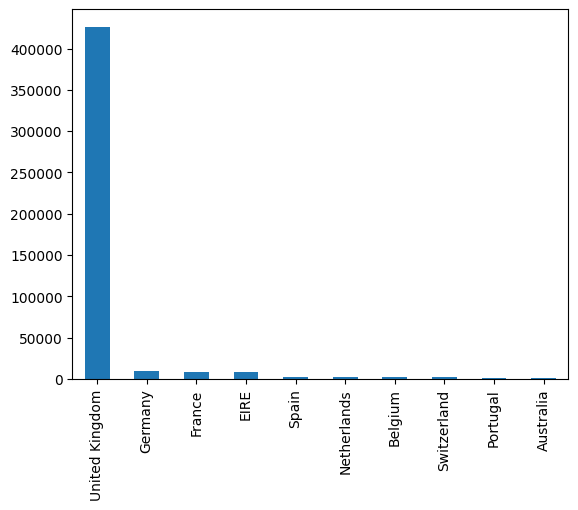

In [112]:
df1.CustomerCountry.value_counts()[:10].plot(kind='bar')

In [113]:
uk_df2=df1[df1.CustomerCountry=='United Kingdom']

In [114]:
uk_df2

,Unnamed: 0,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,0,536365,2010-12-01 08:26:00,2.55,17850,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,1,536365,2010-12-01 08:26:00,3.39,17850,United Kingdom,71053,WHITE METAL LANTERN,6
2,2,536365,2010-12-01 08:26:00,2.75,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,3,536365,2010-12-01 08:26:00,3.39,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,4,536365,2010-12-01 08:26:00,3.39,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...,...
471889,541889,581585,2011-12-09 12:31:00,1.95,15804,United Kingdom,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12
471890,541890,581586,2011-12-09 12:49:00,2.95,13113,United Kingdom,22061,LARGE CAKE STAND HANGING STRAWBERY,8
471891,541891,581586,2011-12-09 12:49:00,1.25,13113,United Kingdom,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24
471892,541892,581586,2011-12-09 12:49:00,8.95,13113,United Kingdom,21217,RED RETROSPOT ROUND CAKE TINS,24


In [115]:
uk_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426261 entries, 0 to 471893
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Unnamed: 0       426261 non-null  int64         
 1   BasketID         426261 non-null  int64         
 2   BasketDate       426261 non-null  datetime64[ns]
 3   Sale             426261 non-null  float64       
 4   CustomerID       426261 non-null  int64         
 5   CustomerCountry  426261 non-null  category      
 6   ProdID           426261 non-null  category      
 7   ProdDescr        425508 non-null  category      
 8   Qta              426261 non-null  int64         
dtypes: category(3), datetime64[ns](1), float64(1), int64(4)
memory usage: 25.1 MB


In [117]:
pip install pygal_maps_world

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.8/270.8 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 12.4 MB/s eta 0:00:00
  Created wheel for pygal_maps_world: filename=pygal_maps_world-1.0.2-py3-none-any.whl size=278546 sha256=2afa550ae843d27bd0b12f5e9665d03660a730f52d76bb90ded2e02c47f024a0
  Stored in directory: /root/.cache/pip/wheels/d7/c6/6a/0b0546db76e2a8ddf6f4426ba7172755470e7139467676b9ef
Successfully built pygal_maps_world


In [120]:
uk_df2.info()
uk_df2.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426261 entries, 0 to 471893
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Unnamed: 0       426261 non-null  int64         
 1   BasketID         426261 non-null  int64         
 2   BasketDate       426261 non-null  datetime64[ns]
 3   Sale             426261 non-null  float64       
 4   CustomerID       426261 non-null  int64         
 5   CustomerCountry  426261 non-null  category      
 6   ProdID           426261 non-null  category      
 7   ProdDescr        425508 non-null  category      
 8   Qta              426261 non-null  int64         
dtypes: category(3), datetime64[ns](1), float64(1), int64(4)
memory usage: 25.1 MB


,Unnamed: 0,BasketID,Sale,CustomerID,Qta
count,426261.000000,426261.000000,426261.000000,426261.000000,426261.000000
mean,274158.812026,560225.991423,3.898847,13199.501233,9.740361
std,155779.056551,13361.455910,85.866634,5758.084836,242.909178
min,0.000000,536365.000000,-11062.060000,0.000000,-80995.000000
25%,140505.000000,548408.000000,1.250000,13427.000000,1.000000
50%,276248.000000,561036.000000,2.080000,15023.000000,4.000000
75%,410441.000000,572103.000000,3.750000,16729.000000,11.000000
max,541893.000000,581586.000000,38970.000000,18287.000000,80995.000000


In [127]:
uk_df3 = uk_df2[(uk_df2['Qta']>0)]
uk_df3
uk_df3.info()
uk_df3.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 417918 entries, 0 to 471893
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Unnamed: 0       417918 non-null  int64         
 1   BasketID         417918 non-null  int64         
 2   BasketDate       417918 non-null  datetime64[ns]
 3   Sale             417918 non-null  float64       
 4   CustomerID       417918 non-null  int64         
 5   CustomerCountry  417918 non-null  category      
 6   ProdID           417918 non-null  category      
 7   ProdDescr        417612 non-null  category      
 8   Qta              417918 non-null  int64         
dtypes: category(3), datetime64[ns](1), float64(1), int64(4)
memory usage: 24.6 MB


,Unnamed: 0,BasketID,Sale,CustomerID,Qta
count,417918.000000,417918.000000,417918.000000,417918.000000,417918.000000
mean,274574.257242,560260.846350,3.363221,13186.625156,10.742406
std,155885.706231,13368.892217,32.162928,5775.200584,175.571107
min,0.000000,536365.000000,-11062.060000,0.000000,1.000000
25%,140774.250000,548461.000000,1.250000,13425.000000,1.000000
50%,276846.500000,561079.000000,2.080000,15023.000000,4.000000
75%,411169.750000,572194.000000,3.750000,16729.000000,12.000000
max,541893.000000,581586.000000,8142.750000,18287.000000,80995.000000
